Model 'Barrel_OBJ.obj' successfully loaded.
Pre-existing model colors removed (if any).

Visualizing mesh components separately...


[vedo.plotter:540] WARNING: having set N, shape is ignored.



--- Model Structural Information ---
Number of Vertices: 4572
Number of Edges:   16992
Number of Faces:    5664

Generating GIF animation 'barril_rotacion_mejorado.gif'...

Animation successfully saved as 'barril_rotacion_mejorado.gif'.

Showing the generated animation (it may take a moment to load):


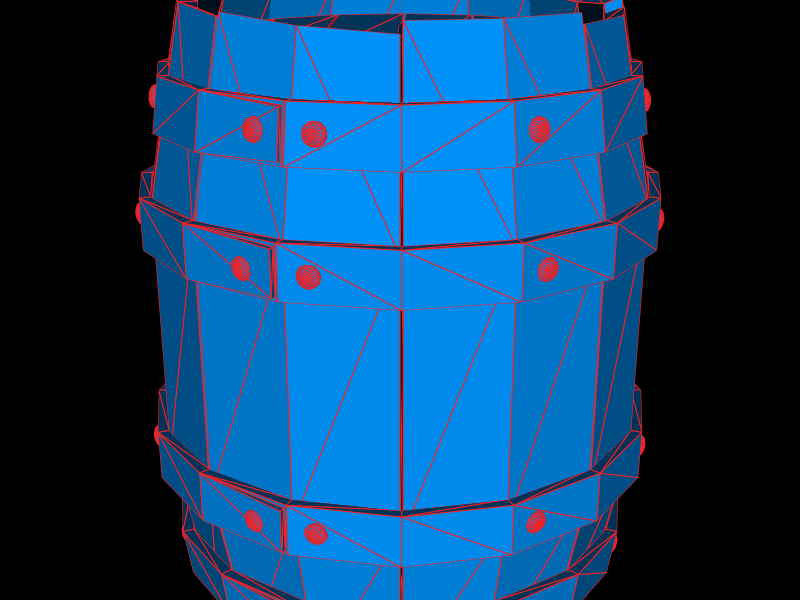

In [1]:
import trimesh
import vedo
import numpy as np
import imageio
from IPython.display import Image, display
import sys

# Centralized Configuration
MODEL_FILENAME = 'Barrel_OBJ.obj'

# Colors
COLOR_VERTICES = 'black'
COLOR_EDGES = 'red'
COLOR_FACES = (0, 150, 255)  # Changed to blue

# Visualization Parameters
VERTEX_SIZE = 8
EDGE_LINE_WIDTH = 2
FACE_EDGE_LINE_WIDTH = 1

# Animation Parameters
ANIMATION_FILENAME = 'barril_rotacion_mejorado.gif'
ANIMATION_FPS = 20
ANIMATION_DURATION_SEC = 4

try:
    mesh = trimesh.load(MODEL_FILENAME)
    print(f"Model '{MODEL_FILENAME}' successfully loaded.")

    mesh.visual.vertex_colors = None
    mesh.visual.face_colors = None
    print("Pre-existing model colors removed (if any).")

except ValueError as e:
    print(f"Error loading model '{MODEL_FILENAME}': {e}", file=sys.stderr)
    print("Make sure the file exists and is in the correct path.", file=sys.stderr)

if 'mesh' in locals():
    print("\nVisualizing mesh components separately...")

    plt = vedo.Plotter(shape=(1, 3), N=3, axes=0, title="3D Mesh Components")

    # Vertices
    vertex_points = vedo.Points(mesh.vertices, c=COLOR_VERTICES, r=VERTEX_SIZE)
    plt.show(vertex_points, at=0, title=f"Vertices ({len(mesh.vertices)}) - Color: Black")

    # Edges
    start_points = mesh.vertices[mesh.edges[:, 0]]
    end_points = mesh.vertices[mesh.edges[:, 1]]
    edge_lines = vedo.Lines(start_points, end_points, c=COLOR_EDGES, lw=EDGE_LINE_WIDTH)
    plt.show(edge_lines, at=1, title=f"Edges ({len(mesh.edges)}) - Color: Red")

    # Faces with Borders
    face_mesh = vedo.Mesh([mesh.vertices, mesh.faces])
    face_mesh.c(COLOR_FACES).lc(COLOR_EDGES).lw(FACE_EDGE_LINE_WIDTH)
    plt.show(face_mesh, at=2, title=f"Faces ({len(mesh.faces)}) - Color: Blue/Red")

    # Structural Information
    print("\n--- Model Structural Information ---")
    print(f"Number of Vertices: {len(mesh.vertices)}")
    print(f"Number of Edges:   {len(mesh.edges)}")
    print(f"Number of Faces:    {len(mesh.faces)}")

    def generar_animacion_rotacion(trimesh_mesh, filename, fps, duration, bg_color='black'):
        """
        Generates a GIF animation rotating the mesh 360 degrees around the Z axis.
        """
        print(f"\nGenerating GIF animation '{filename}'...")

        plotter_anim = vedo.Plotter(offscreen=True, bg=bg_color, axes=0)

        vedo_mesh_anim = vedo.Mesh([trimesh_mesh.vertices, trimesh_mesh.faces])
        vedo_mesh_anim.c(COLOR_FACES).lc(COLOR_EDGES).lw(FACE_EDGE_LINE_WIDTH)

        n_frames = int(fps * duration)
        frames = []
        angles = np.linspace(0, 360, n_frames, endpoint=False)

        for i, angle in enumerate(angles):
            plotter_anim.clear()
            plotter_anim.add(vedo_mesh_anim)
            plotter_anim.show(azimuth=angle, elevation=20)
            frames.append(plotter_anim.screenshot(asarray=True))

        imageio.mimsave(filename, frames, fps=fps, loop=0)
        plotter_anim.close()

        print(f"\nAnimation successfully saved as '{filename}'.")
        return Image(filename=filename)

    gif_result = generar_animacion_rotacion(mesh,
                                        filename=ANIMATION_FILENAME,
                                        fps=ANIMATION_FPS,
                                        duration=ANIMATION_DURATION_SEC)

    print("\nShowing the generated animation (it may take a moment to load):")
    display(gif_result)

else:
    print("\nCould not continue due to an error loading the model.")